<a href="https://colab.research.google.com/github/hitarthi45/Machine-Learning/blob/main/Experiment/ML_titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/exp-1_train.csv')
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [ ]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
#HW

In [ ]:
# Step 1: Define the linear regression model
class LinearRegression:
    def __init__(self):
        self.m = 0  # Slope
        self.c = 0  # Intercept

    def predict(self, x):
        return self.m * x + self.c

In [ ]:
# Step 2: Define the loss function (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [ ]:
# Step 3: Implement gradient descent
def gradient_descent(x, y, model, alpha, iterations):
    losses = []
    n = len(x)

    for _ in range(iterations):
        y_pred = model.predict(x)
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)

        # Calculate gradients
        dm = (-2/n) * np.sum(x * (y - y_pred))
        dc = (-2/n) * np.sum(y - y_pred)

        # Update parameters
        model.m = model.m - alpha * dm
        model.c = model.c - alpha * dc

    return losses

In [ ]:
# Step 4: Train the model for each alpha value and record losses
alphas = [0.000000001, 0.000001, 0.01, 1, 5, 10, 100]
iterations = 1000  # You can adjust the number of iterations

loss_curves = {}

# Assuming 'data' DataFrame is already loaded and contains 'x' and 'y' columns
# Handle potential missing values in 'y' if necessary, as seen in data.describe() output
data_cleaned = data.dropna(subset=['x', 'y'])
x = data_cleaned['x']
y = data_cleaned['y']


for alpha in alphas:
    model = LinearRegression()
    losses = gradient_descent(x, y, model, alpha, iterations)
    loss_curves[alpha] = losses

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/tmp/ipython-input-1367092227.py:16: RuntimeWarning: invalid value encountered in scalar subtract
  model.m = model.m - alpha * dm
/tmp/ipython-input-1367092227.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  model.c = model.c - alpha * dc


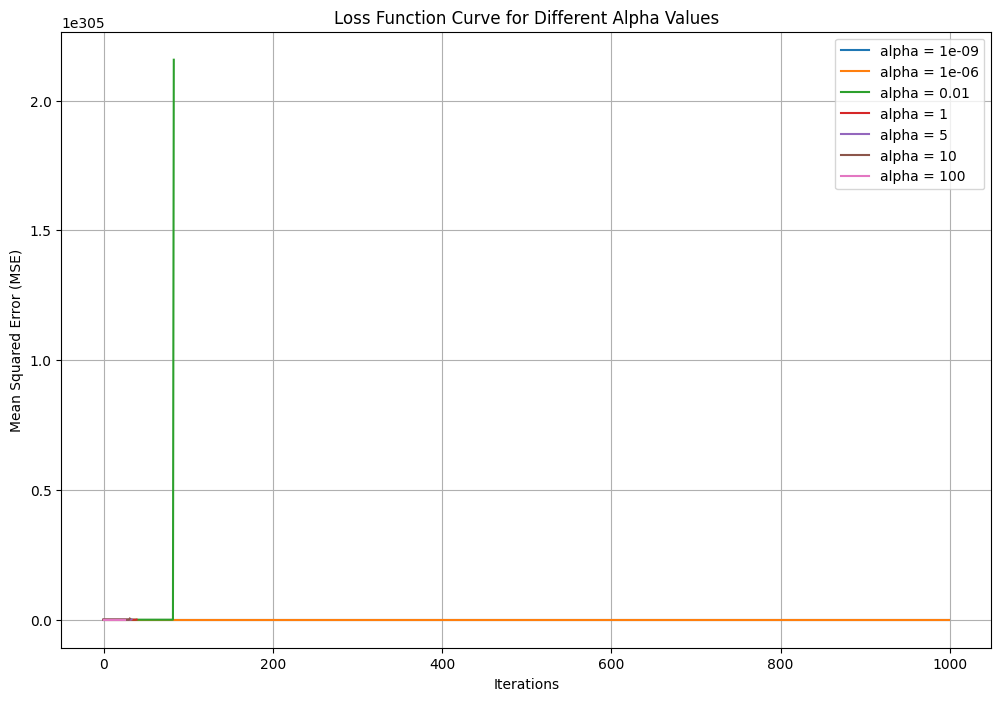

In [ ]:
# Step 5: Visualize the loss curves
plt.figure(figsize=(12, 8))
for alpha, losses in loss_curves.items():
    plt.plot(range(iterations), losses, label=f'alpha = {alpha}')

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss Function Curve for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()